In [37]:
import xarray as xr
from pathlib import Path

import functions.eddy_feedback as ef

In [38]:
mm_path = Path('/home/links/ct715/data_storage/PAMIP/processed_monthly/regridded_3x3/1.6_pdSST-futArcSIC')
mm = xr.open_mfdataset(
    mm_path / 'HadGEM3-GC31-MM_ua_epfy_divF_r300_3x3_futArc.nc'
)
mm

<xarray.Dataset>
Dimensions:  (ens_ax: 300, time: 12, level: 19, lat: 61)
Coordinates:
  * time     (time) object 2000-06-16 00:00:00 ... 2001-05-16 00:00:00
  * level    (level) float64 1e+03 925.0 850.0 700.0 600.0 ... 20.0 10.0 5.0 1.0
  * lat      (lat) int64 -90 -87 -84 -81 -78 -75 -72 ... 72 75 78 81 84 87 90
Dimensions without coordinates: ens_ax
Data variables:
    ubar     (ens_ax, time, level, lat) float32 dask.array<chunksize=(300, 12, 19, 61), meta=np.ndarray>
    epfy     (ens_ax, time, level, lat) float32 dask.array<chunksize=(300, 12, 19, 61), meta=np.ndarray>
    divF     (ens_ax, time, level, lat) float64 dask.array<chunksize=(300, 12, 19, 61), meta=np.ndarray>

In [39]:
ll_path = Path('/home/links/ct715/data_storage/PAMIP/monthly/1.6_pdSST-futArcSIC')
model = 'HadGEM3-GC31-LL'

ds_ua = xr.open_mfdataset(
    str(ll_path / 'ua' / model / '*.nc'),
    parallel=True,
    combine='nested',
    concat_dim='ens_ax'
)
ua = ds_ua.u 
ua = ua.rename({
    't': 'time',
    'p_1': 'level',
    'latitude_1': 'lat',
    'longitude_1': 'lon'
})
ua = ua.sel(time=slice('2000-06', '2001-05'))
ua

<xarray.DataArray 'u' (ens_ax: 100, time: 12, level: 19, lat: 145, lon: 192)>
dask.array<getitem, shape=(100, 12, 19, 145, 192), dtype=float32, chunksize=(1, 12, 19, 145, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2000-06-16 00:00:00 ... 2001-05-16 00:00:00
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float32 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * level    (level) float32 1e+03 925.0 850.0 700.0 600.0 ... 20.0 10.0 5.0 1.0
Dimensions without coordinates: ens_ax
Attributes:
    source:         Unified Model Output (Vn10.7):
    name:           u
    title:          U COMPNT OF WIND ON P LEV/UV GRID
    date:           01/04/00
    time:           00:00
    long_name:      U COMPNT OF WIND ON P LEV/UV GRID
    standard_name:  eastward_wind
    units:          m s-1
    valid_min:      -93.10986
    valid_max:      69.80957

In [40]:
ds_epfy = xr.open_mfdataset(
    str(ll_path / 'epfy' / model / '*.nc'),
    parallel=True,
    combine='nested',
    concat_dim='ens_ax'
)
epfy = ds_epfy.epfy
epfy = epfy.sel(time=slice('2000-06', '2001-05'))
epfy

<xarray.DataArray 'epfy' (ens_ax: 100, time: 10, level: 19, lat: 145)>
dask.array<getitem, shape=(100, 10, 19, 145), dtype=float32, chunksize=(1, 10, 19, 145), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 2000-06-16 00:00:00 ... 2001-03-16 00:00:00
    longitude  float32 358.1
  * lat        (lat) float32 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Dimensions without coordinates: ens_ax
Attributes:
    long_name:     ELIASSEN-PALM FLUX (MERID. COMPNT)
    units:          
    cell_methods:  t: mean
    source:        Unified Model Output (Vn10.7):
    name:          field1077
    title:         ELIASSEN-PALM FLUX (MERID. COMPNT)
    date:          01/04/00
    time:          00:00

In [41]:
ds = xr.Dataset({
    'ua': ua,
    'epfy': epfy
})
ds

<xarray.Dataset>
Dimensions:    (time: 12, lon: 192, lat: 145, level: 19, ens_ax: 100)
Coordinates:
  * time       (time) object 2000-06-16 00:00:00 ... 2001-05-16 00:00:00
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat        (lat) float32 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
    longitude  float32 358.1
Dimensions without coordinates: ens_ax
Data variables:
    ua         (ens_ax, time, level, lat, lon) float32 dask.array<chunksize=(1, 12, 19, 145, 192), meta=np.ndarray>
    epfy       (ens_ax, time, level, lat) float32 dask.array<chunksize=(1, 12, 19, 145), meta=np.ndarray>

In [42]:
import numpy as np
ds = ds.interp(lat=np.arange(-90,93,3), lon=np.arange(0,363,3))
ds

<xarray.Dataset>
Dimensions:    (time: 12, level: 19, ens_ax: 100, lat: 61, lon: 121)
Coordinates:
  * time       (time) object 2000-06-16 00:00:00 ... 2001-05-16 00:00:00
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
    longitude  float32 358.1
  * lat        (lat) int64 -90 -87 -84 -81 -78 -75 -72 ... 72 75 78 81 84 87 90
  * lon        (lon) int64 0 3 6 9 12 15 18 21 ... 342 345 348 351 354 357 360
Dimensions without coordinates: ens_ax
Data variables:
    ua         (ens_ax, time, level, lat, lon) float32 dask.array<chunksize=(1, 12, 19, 61, 121), meta=np.ndarray>
    epfy       (ens_ax, time, level, lat) float32 dask.array<chunksize=(1, 12, 19, 61), meta=np.ndarray>

In [43]:
ds = ef.calculate_divFphi(ds, save_divFphi='divF')
ds = ds.rename({'u': 'ua'})
ds

<xarray.Dataset>
Dimensions:    (time: 12, level: 19, ens_ax: 100, lat: 61, lon: 121)
Coordinates:
  * time       (time) object 2000-06-16 00:00:00 ... 2001-05-16 00:00:00
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
    longitude  float32 358.1
  * lat        (lat) int64 -90 -87 -84 -81 -78 -75 -72 ... 72 75 78 81 84 87 90
  * lon        (lon) int64 0 3 6 9 12 15 18 21 ... 342 345 348 351 354 357 360
Dimensions without coordinates: ens_ax
Data variables:
    ua         (ens_ax, time, level, lat, lon) float32 dask.array<chunksize=(1, 12, 19, 61, 121), meta=np.ndarray>
    epfy       (ens_ax, time, level, lat) float32 dask.array<chunksize=(1, 12, 19, 61), meta=np.ndarray>
    divF       (ens_ax, time, level, lat) float64 0.0 2.938e-07 ... nan nan

In [44]:
# ds.to_netcdf('/home/links/ct715/data_storage/PAMIP/processed_monthly/regridded_3x3/1.6_pdSST-futArcSIC/HadGEM3-GC31-LL_ua_epfy_divF_r100_3x3_futArc.nc')

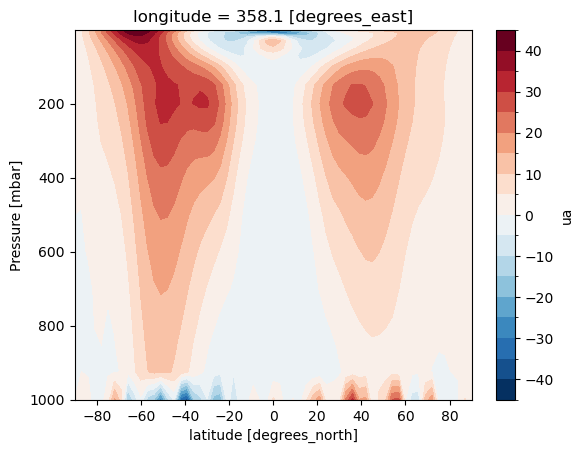

In [46]:
ds.ua.mean(('time', 'ens_ax', 'lon')).plot.contourf(levels=20, yincrease=False)

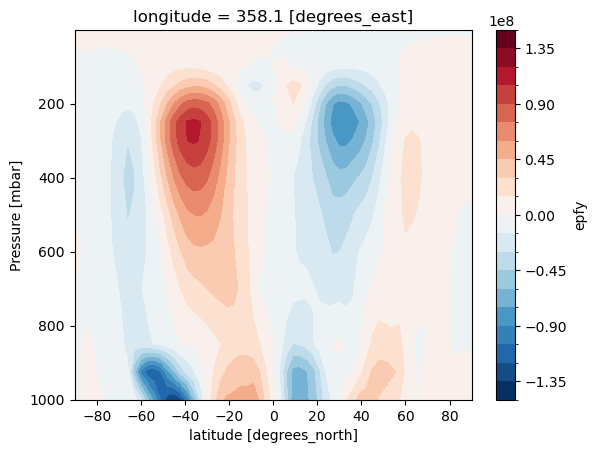

In [47]:
ds.epfy.mean(('time', 'ens_ax')).plot.contourf(levels=20, yincrease=False)

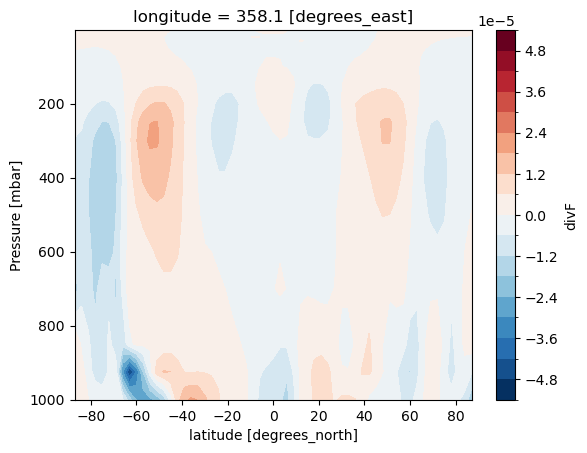

In [49]:
ds1 = ds.sel(lat=slice(-87,87))
ds1.divF.mean(('time', 'ens_ax')).plot.contourf(levels=20, yincrease=False)